In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("train_ctrUa4K.csv")

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# Fill categorical columns with mode safely (no warnings)
for col in ['Gender', 'Married', 'Self_Employed', 'Dependents']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
# Step 2: Fill numerical missing values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Step 3: Clean Dependents column
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)


In [29]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
# Clean Dependents column
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

In [33]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 60.1+ KB
None


In [39]:
print(df.head())

    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No           0      Graduate            No   
1  LP001003   Male     Yes           1      Graduate            No   
2  LP001005   Male     Yes           0      Graduate           Yes   
3  LP001006   Male     Yes           0  Not Graduate            No   
4  LP001008   Male      No           0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

In [41]:
# Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_limit, upper_limit)
    return df

# Apply to key numerical columns
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    df = cap_outliers(df, col)

In [43]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode binary categorical columns
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    df[col] = le.fit_transform(df[col])

In [45]:
# Define features and target
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status'].map({'Y': 1, 'N': 0})  # Convert target to 0/1

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [51]:
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate performance
print("✅ Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Logistic Regression Accuracy: 0.8536585365853658

Confusion Matrix:
 [[21 17]
 [ 1 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



C:\Users\anasm\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("🌲 Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))


🌲 Random Forest Accuracy: 0.8373983739837398

Confusion Matrix:
 [[24 14]
 [ 6 79]]


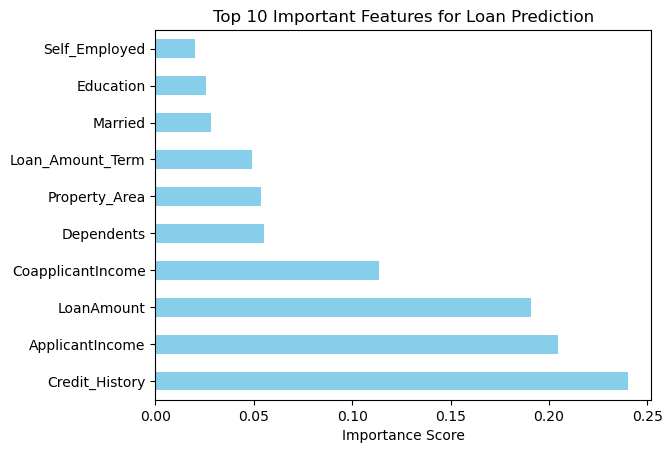

In [57]:
# Get feature importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features for Loan Prediction")
plt.xlabel("Importance Score")
plt.show()

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.8373983739837398

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.85      0.93      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.83      0.84      0.83       123


Confusion Matrix:
 [[24 14]
 [ 6 79]]


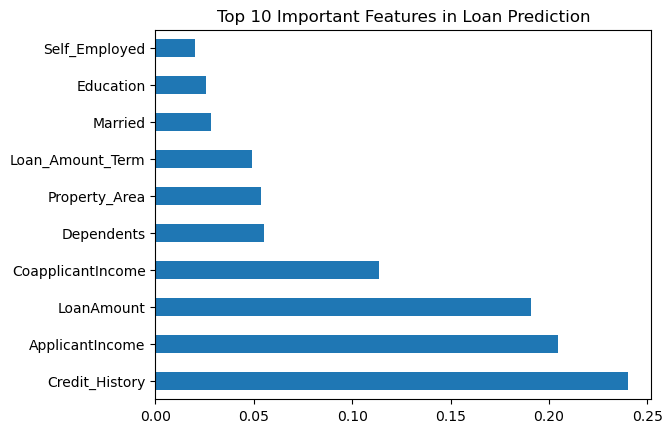

In [67]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features in Loan Prediction")
plt.show()

In [101]:
test_df = pd.read_csv("test.csv")

# Fill missing categorical values with mode
for col in ['Gender', 'Married', 'Self_Employed', 'Dependents']:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# Fill missing numerical values
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].median())
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].median())
test_df['Credit_History'] = test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0])

# Clean Dependents column
test_df['Dependents'] = test_df['Dependents'].replace('3+', 3).astype(int)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    test_df[col] = le.fit_transform(test_df[col])

# Make sure test has same columns as X_train
test_df = test_df[X.columns]

test_pred = rf_model.predict(test_df)

# Create submission file
submission = pd.DataFrame({
    'Loan_ID': pd.read_csv("test.csv")['Loan_ID'],
    'Loan_Status': ['Y' if x == 1 else 'N' for x in test_pred]
})

submission.to_csv("final_submission.csv", index=False)
print("✅ Submission file created: final_submission.csv")

✅ Submission file created: final_submission.csv


In [75]:
from sklearn.metrics import accuracy_score

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")


Model Accuracy: 83.74 %


In [79]:
df['Loan_ID'].unique()[:10]  # just to inspect first few IDs

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020'],
      dtype=object)

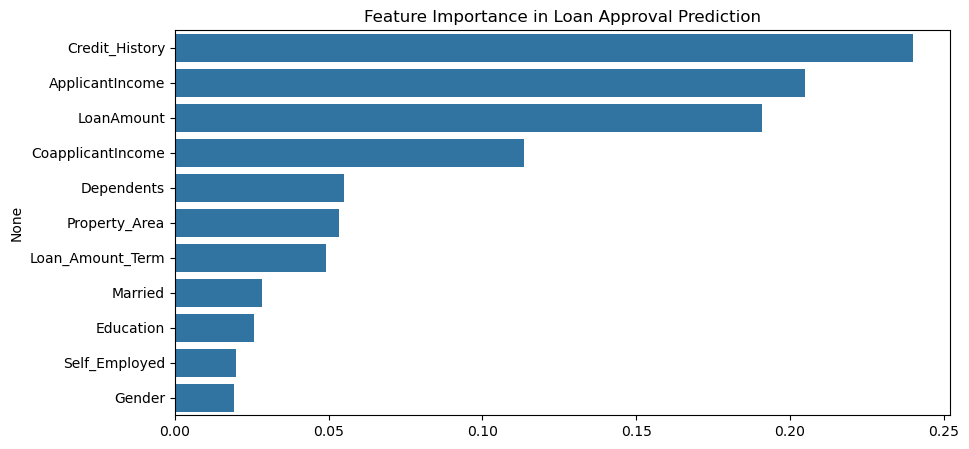

In [83]:
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_imp.values, y=feature_imp.index)
plt.title("Feature Importance in Loan Approval Prediction")
plt.show()

In [85]:
y_pred = rf_model.predict(X_test)
wrong_preds = X_test[y_test != y_pred]
print(wrong_preds.head())

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
191       1        0           0          0              0         10171.25   
88        1        0           0          0              0          8566.00   
500       0        0           0          0              0           645.00   
581       1        0           0          0              0          1836.00   
326       1        0           0          0              0          4917.00   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
191              0.000       164.0             360.0             1.0   
88               0.000       210.0             360.0             1.0   
500           3683.000       113.0             480.0             1.0   
581           5743.125        90.0             360.0             1.0   
326              0.000       130.0             360.0             0.0   

     Property_Area  
191              1  
88               2  
500              0  
581     

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                
    n_jobs=-1,           
    verbose=2,
    scoring='accuracy' 
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [96]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8004122861265719


Tuned Model Accuracy: 0.8536585365853658

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



<Axes: >

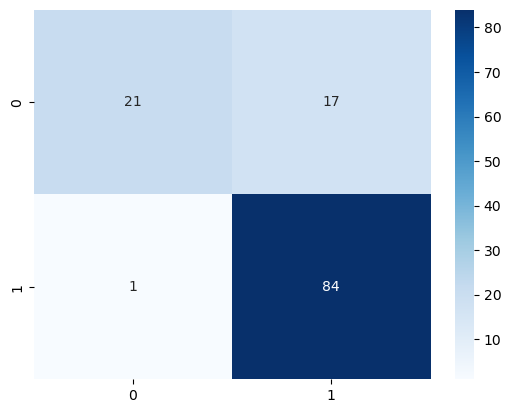

In [99]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
